In [40]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt


In [41]:
import numpy as np
import pandas as pd
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func


In [43]:
# Create engine using the `hawaii.sqlite` database file
engine = create_engine("sqlite:///Resources/hawaii.sqlite")


In [44]:
# Declare a Base using `automap_base()`
Base = automap_base()
# Use the Base class to reflect the database tables
Base.prepare(engine, reflect=True)

C:\Users\dehey\AppData\Local\Temp\ipykernel_2772\3601434573.py:4: SADeprecationWarning: The AutomapBase.prepare.reflect parameter is deprecated and will be removed in a future release.  Reflection is enabled when AutomapBase.prepare.autoload_with is passed.
  Base.prepare(engine, reflect=True)


In [45]:
# Print all of the classes mapped to the Base
print(Base.classes.keys())

['station', 'measurement']


In [46]:
# Assign the measurement class to a variable called `Measurement` and
# the station class to a variable called `Station`
Measurement = Base.classes.measurement
Station = Base.classes.station

In [47]:
# Create a session
session = Session(engine)

# Exploratory Precipitation Analysis

In [48]:
# Calculate the most recent date in the dataset as a string
most_recent_date_str = session.query(func.max(Measurement.date)).scalar()
print(most_recent_date)

2017-08-23 00:00:00


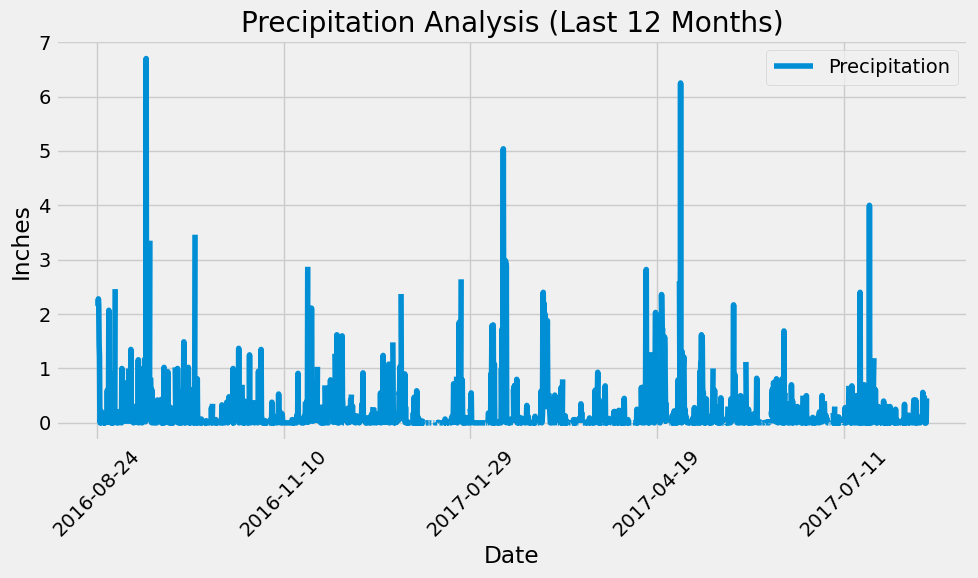

In [49]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.
# Starting from the most recent data point in the database.
# Had to convert the most_recent_date into a datetime object
most_recent_date = datetime.strptime(most_recent_date_str, '%Y-%m-%d')

# Calculate the date one year from the last date in data set.
one_year_ago = most_recent_date - timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp_data = session.query(Measurement.date, Measurement.prcp).\
            filter(Measurement.date >= one_year_ago).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_data, columns=['date', 'prcp'])

# Sort the dataframe by date
prcp_df.set_index('date', inplace=True)
prcp_df.sort_index(inplace=True)

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot(kind='line', figsize=(10, 6), rot=45)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.title("Precipitation Analysis (Last 12 Months)")
plt.legend(["Precipitation"])
plt.tight_layout()
plt.show()

In [50]:
# Use Pandas to calculate the summary statistics for the precipitation data
print(prcp_df.describe())

              prcp
count  2015.000000
mean      0.176462
std       0.460288
min       0.000000
25%       0.000000
50%       0.020000
75%       0.130000
max       6.700000


# Exploratory Station Analysis

In [51]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
print(total_stations)

9


In [52]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
                       group_by(Measurement.station).\
                       order_by(func.count(Measurement.station).desc()).all()
print(most_active_stations)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [53]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = most_active_stations[0][0]
temp_stats = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
             filter(Measurement.station == most_active_station).all()
print(temp_stats)

[(54.0, 85.0, 71.66378066378067)]


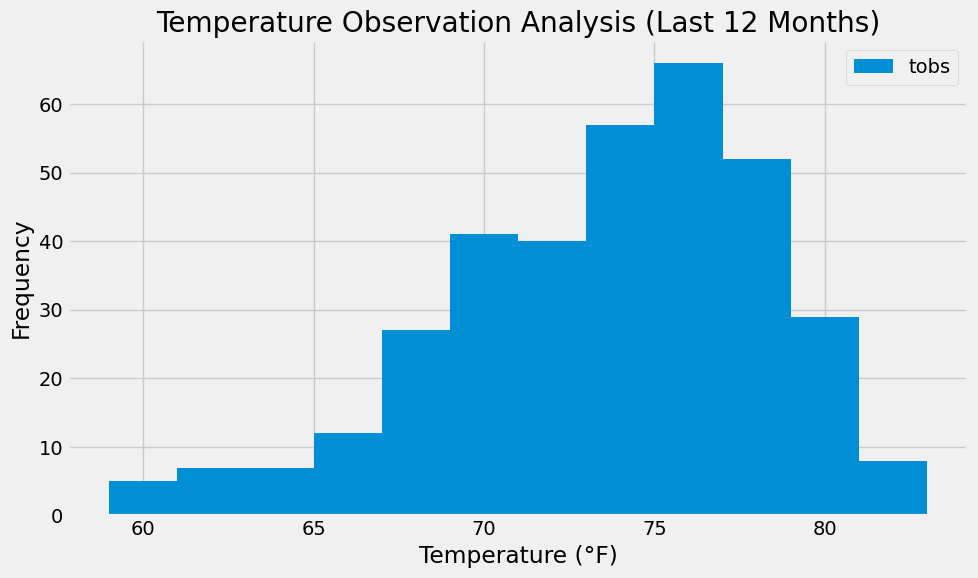

In [54]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tobs_data = session.query(Measurement.date, Measurement.tobs).\
            filter(Measurement.station == most_active_station).\
            filter(Measurement.date >= one_year_ago).all()

# Loading the data into a dataframe
tobs_df = pd.DataFrame(tobs_data, columns=['date', 'tobs'])

# Plotting the results as a histogram
tobs_df.plot(kind='hist', bins=12, figsize=(10, 6))
plt.xlabel("Temperature (°F)")
plt.ylabel("Frequency")
plt.title("Temperature Observation Analysis (Last 12 Months)")
plt.tight_layout()
plt.show()

# Close Session

In [55]:
# Close Session
session.close()
